In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class opticalSystem:
    def __init__(self, lens1Focal, lens1to2Gap, lens2Focal, lens2to3Gap, lens3Focal):
        #floats, are what they say, in mms
        #below we set up the above as lists
        self.focal = [lens1Focal,lens2Focal,lens3Focal]
        self.delX = [100, lens1to2Gap, lens2to3Gap, 100]
        self.x = [-self.delX[0],0,self.delX[1],self.delX[2]+self.delX[1], self.delX[3]+self.delX[2]+self.delX[1]]
        #then make a list of the Rates of Convergance of our lenses
        self.c = [0,1/self.focal[0],1/self.focal[1],1/self.focal[2]]
    
    def simRay(self,rayC, y1):
        
        y0 = y1 + (rayC*self.delX[0])
        y1 = y1
        y2 = y1 - (rayC + self.c[1]*y1)*(self.delX[1])
        y3 = y2 - (rayC + self.c[1]*y1 + self.c[2]*y2)*self.delX[2]
        y4 = y2 - (rayC + self.c[1]*y1 + self.c[2]*y2 + self.c[3]*y3)*self.delX[3]
        
        y = np.array([y0,y1,y2,y3,y4])
        
        dy0 = (y1-y0)/self.delX[0]
        dy1 = (y2-y1)/self.delX[1]
        dy2 = (y3-y2)/self.delX[2]
        dy3 = (y4-y3)/self.delX[3]
        
        dy = [dy0,dy1,dy2,dy3]
        
        start = 0
        x = np.array(self.x)
        
        return np.array([x,y])

In [3]:
def imageRays(distance,yIn,lensRadius,numRays):
    #This function generates a list of indident rays defined by an objects location.
    #all in are floats except numRays, which is an int
    #outputs a numpy array of the rays slopes and x hit on a lens
    rays = []
    
    for i in np.linspace(-lensRadius,lensRadius,num=numRays):
        c = (yIn-i)/distance
        y = i
        rays.append(np.array([c,y]))
    
    
    return np.array(rays)

In [4]:
def intersection(x1,y1,x2,y2):
    #this takes the ray data I'm building up and returns any intersections between the two rays.
    #all inputs are lists of points that are connected by lines
    #IT IS ASSUMED ALL INPUT LISTS ARE OF SAME LENGTH, x1 = x2
    
    intersects = []
    #find intersections in the between lens regime
    for i in range(1,len(x1),1):
        denom = y1[i-1]-y1[i]-y2[i-1]+y2[i]
        
        if denom != 0:
            intX = (y1[i-1]-y2[i-1]) * (x1[i]-x1[i-1]) / denom
            intX += x1[i-1]
            intY = y2[i-1] + (intX-x2[i-1]) * (y2[i]-y2[i-1])/(x2[i]-x2[i-1])
            if intX <= x1[i] and intX >= x1[i-1]:
                intersects.append([intX, intY])
                
    
    #find any after lens intersections
    
    
    return np.array(intersects)

In [5]:
data = np.load("massLens2.npy")
data = np.array(data)
print(len(data))

953691


In [6]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
def plotLenses(x, y, title, xname,yname,line):
    %matplotlib notebook
    plt.figure(figsize=(12, 6), dpi=80)
    #plt.xlim((-1.2,-.2))
    #plt.ylim((25,75))
    plt.scatter(x,y, s=2)
    if line:
        xlin=np.linspace(0,300,1000)
        plt.plot(xlin,xlin)
    plt.ylabel(yname)
    plt.xlabel(xname)
    plt.title(title)
    plt.show()

The list is 953691 long


/tmp/ipykernel_283/153059627.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<100]


The list is now847561 long


<IPython.core.display.Javascript object>


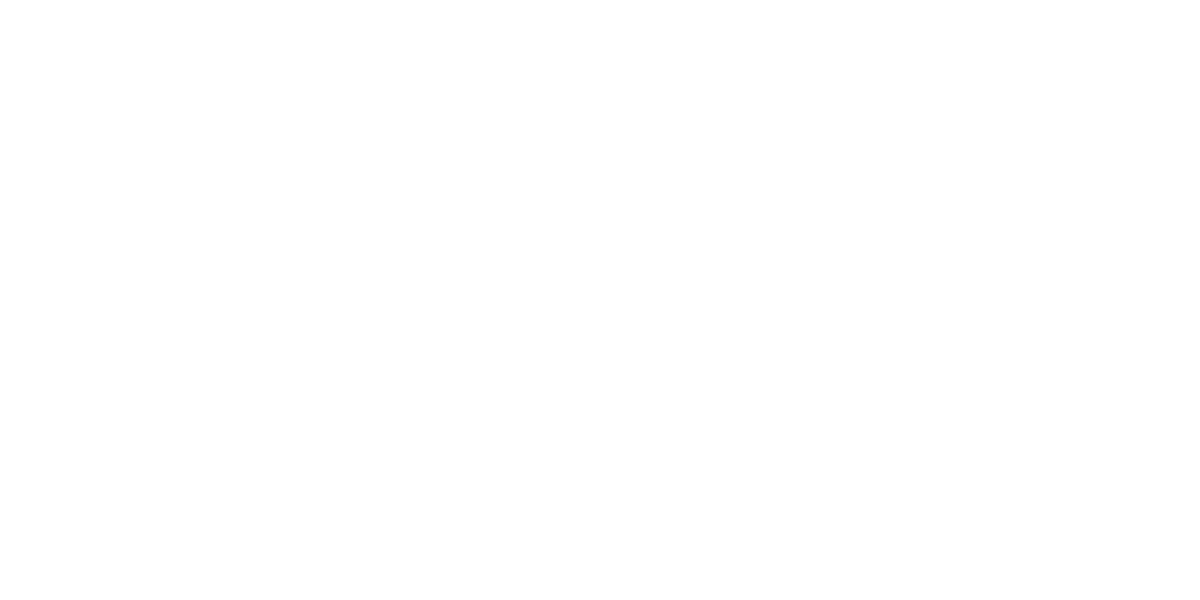

In [7]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
print("The list is " + str(len(data)) + " long")

np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<100]
data = np.array(data)
print("The list is now" + str(len(data)) + " long")

plotLenses(100*data[:,3], data[:,1]/data[:,3], 'Focal Length vs Filter Magnification', "Focal Length","Filter over Image Size",False)

The list is now 3615 long


<IPython.core.display.Javascript object>


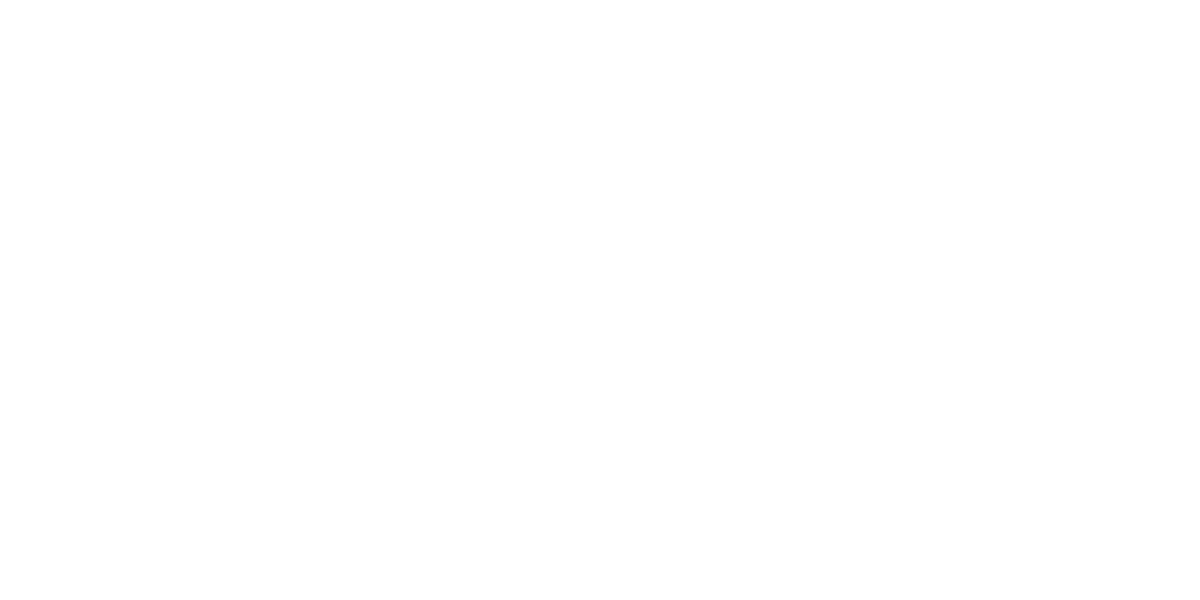

In [8]:
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<3]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if 100*data[x,3]<55 and 100*data[x,3]>48]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(100*data[:,3], data[:,1]/data[:,3], 'Focal Length vs Filter Magnification', "Focal Length","Filter over Image Size",False)

The list is now 2982 long


<IPython.core.display.Javascript object>


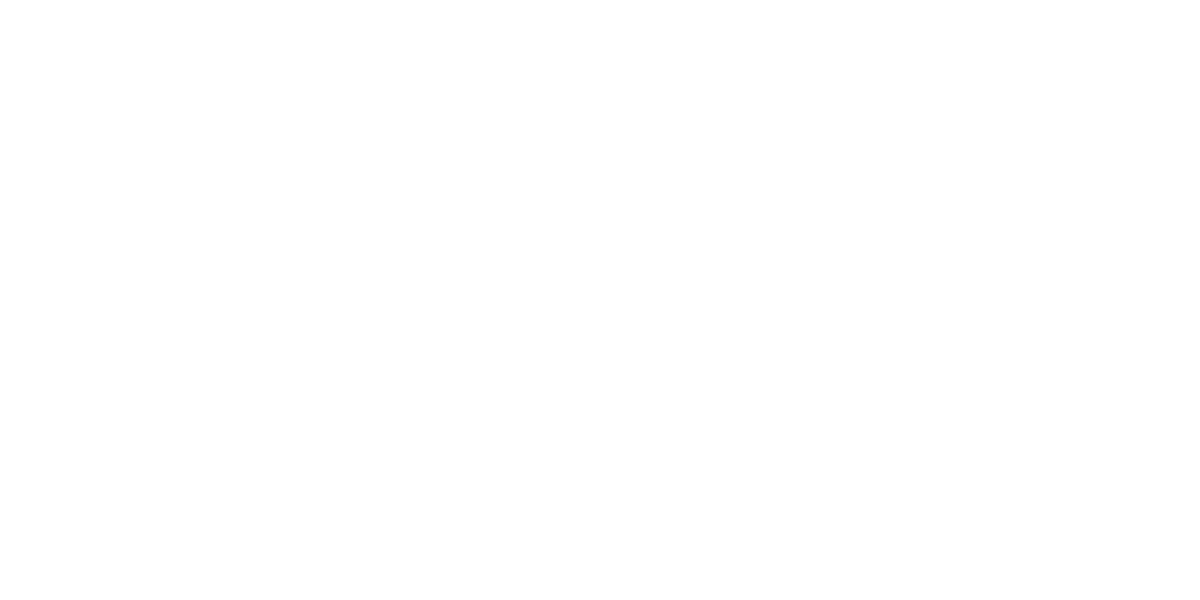

In [9]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2]-data[x,7]-data[x,8]>43]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(data[:,2], data[:,1]/data[:,3], 'Size of Lens vs Filter Magnification', "Lens Assembly Length","Filter over Image Size",False)

The list is now 1135 long


<IPython.core.display.Javascript object>


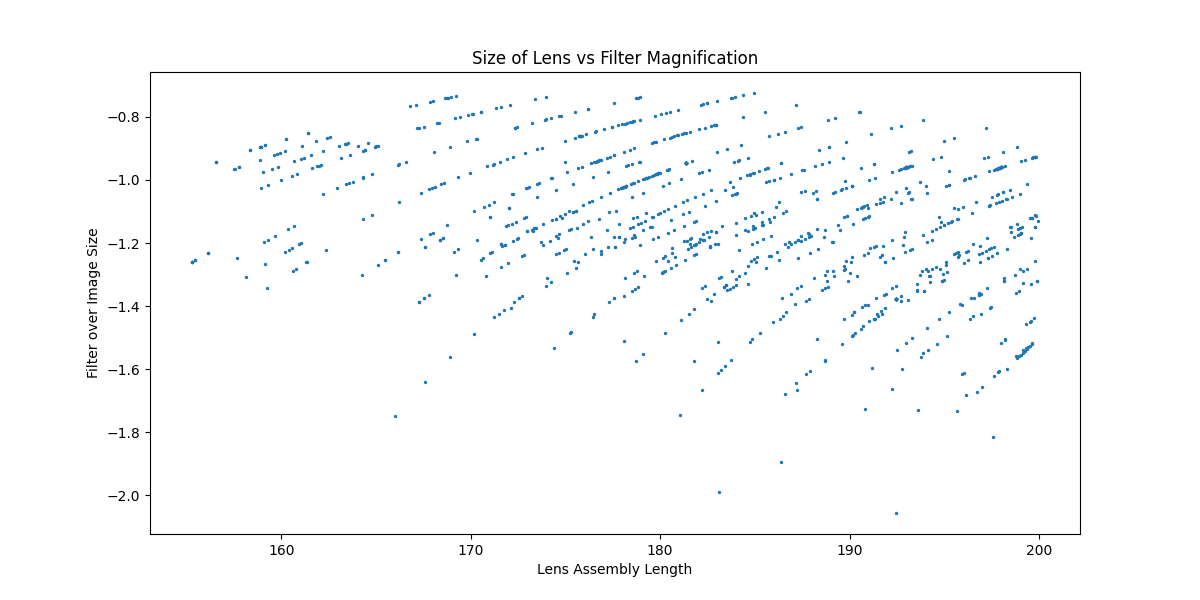

In [10]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2]<200]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(data[:,2], data[:,1]/data[:,3], 'Size of Lens vs Filter Magnification', "Lens Assembly Length","Filter over Image Size",False)

The list is now 61 long


<IPython.core.display.Javascript object>


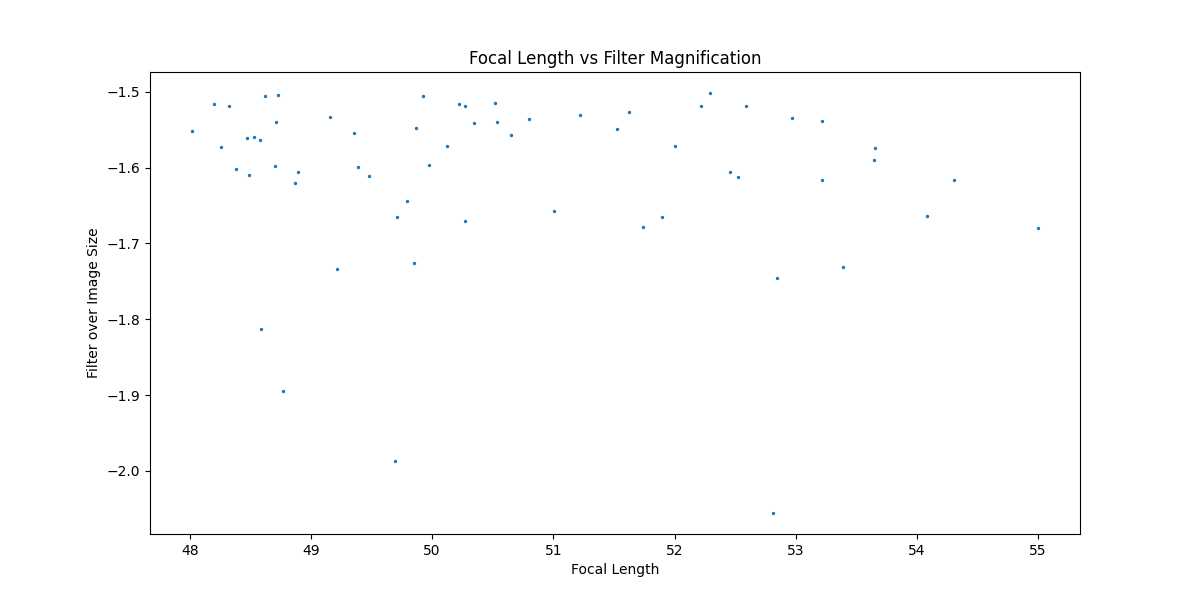

In [17]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])>1.5]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(100*data[:,3], data[:,1]/data[:,3], 'Focal Length vs Filter Magnification', "Focal Length","Filter over Image Size",False)

<IPython.core.display.Javascript object>


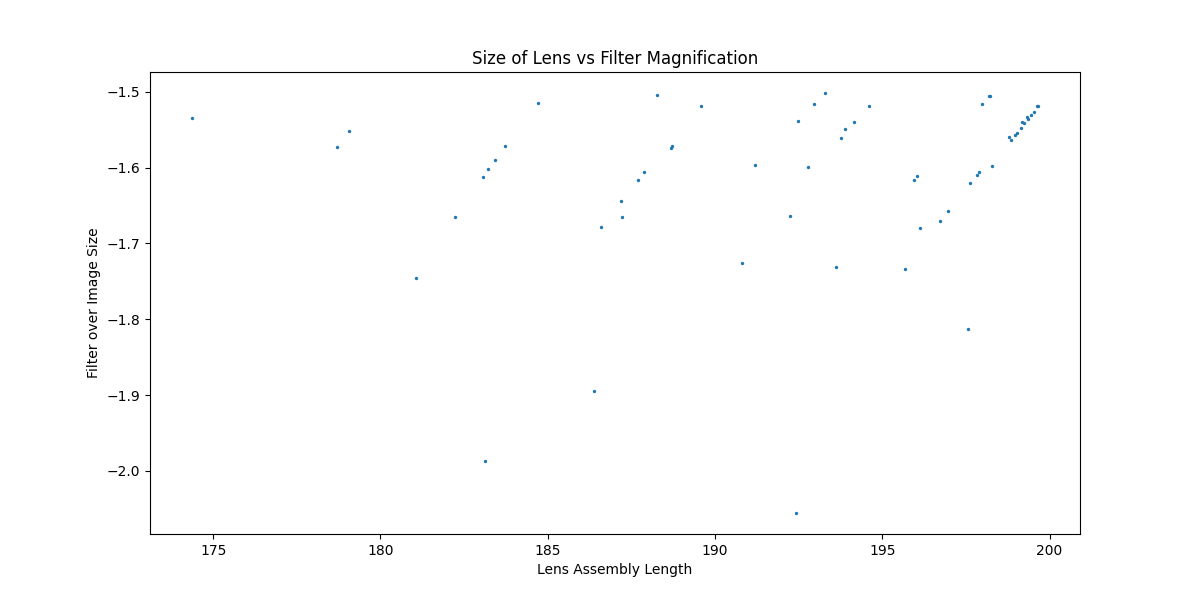

In [18]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y

plotLenses(data[:,2], data[:,1]/data[:,3], 'Size of Lens vs Filter Magnification', "Lens Assembly Length","Filter over Image Size",False)

The list is now 22 long


<IPython.core.display.Javascript object>


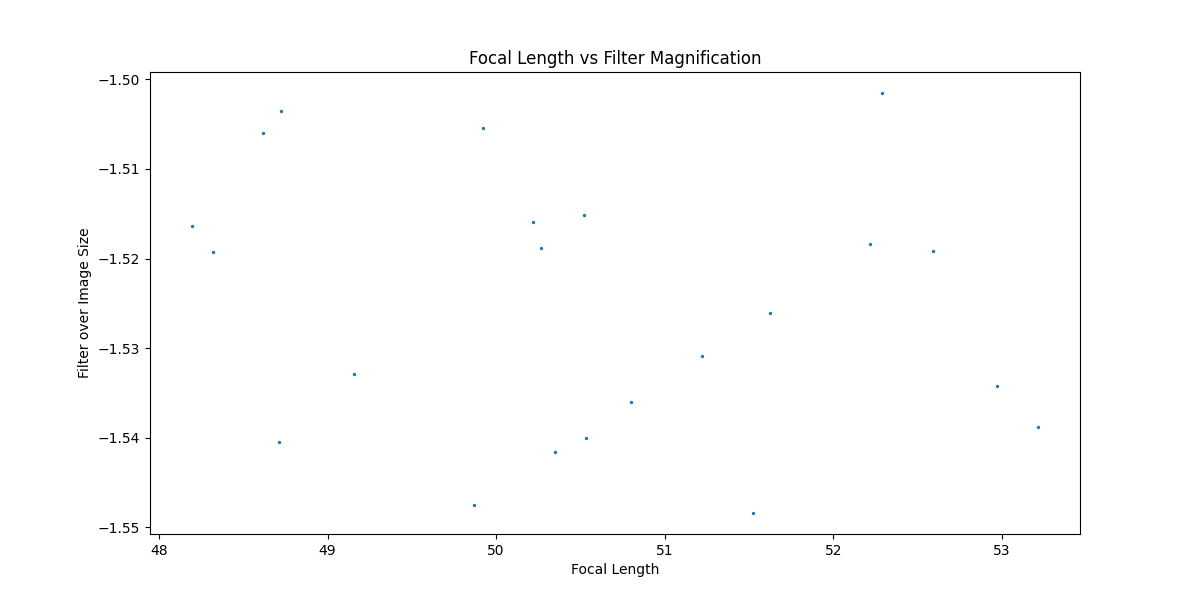

In [22]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,7]>20]
data = np.array(data)
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<1.55]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(100*data[:,3], data[:,1]/data[:,3], 'Focal Length vs Filter Magnification', "Focal Length","Filter over Image Size",False)

<IPython.core.display.Javascript object>


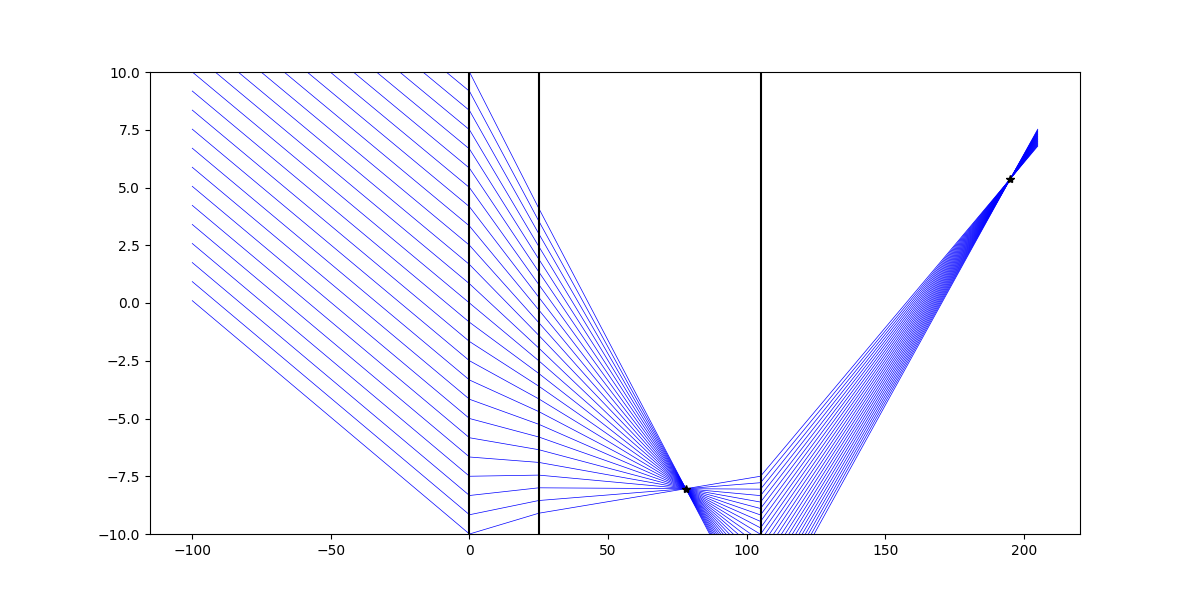

<IPython.core.display.Javascript object>


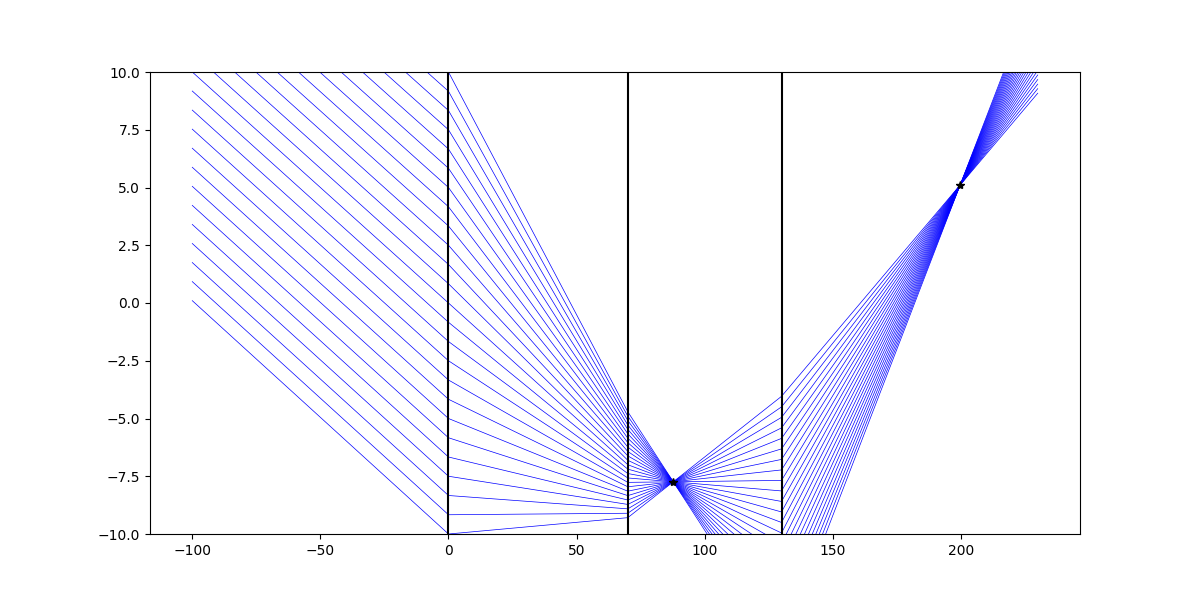

<IPython.core.display.Javascript object>


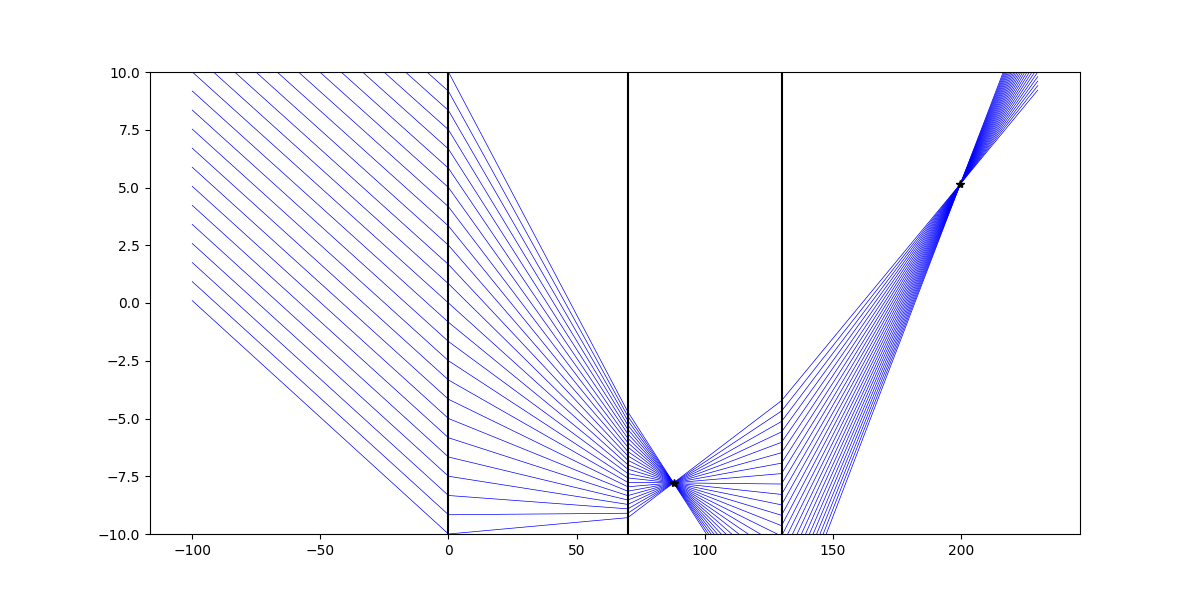

<IPython.core.display.Javascript object>


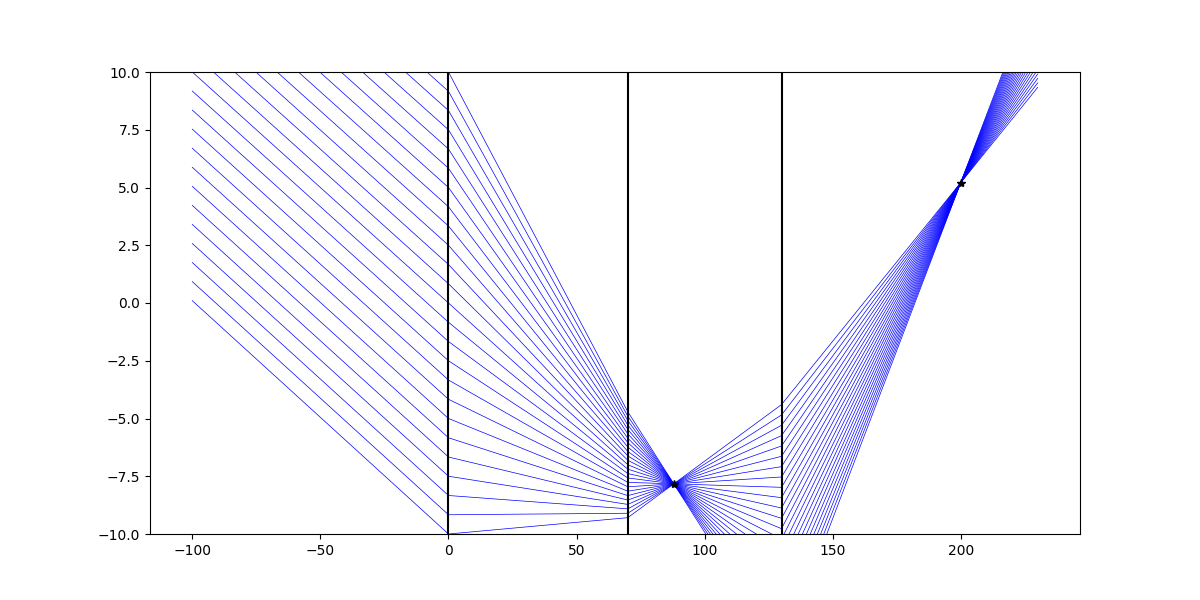

<IPython.core.display.Javascript object>


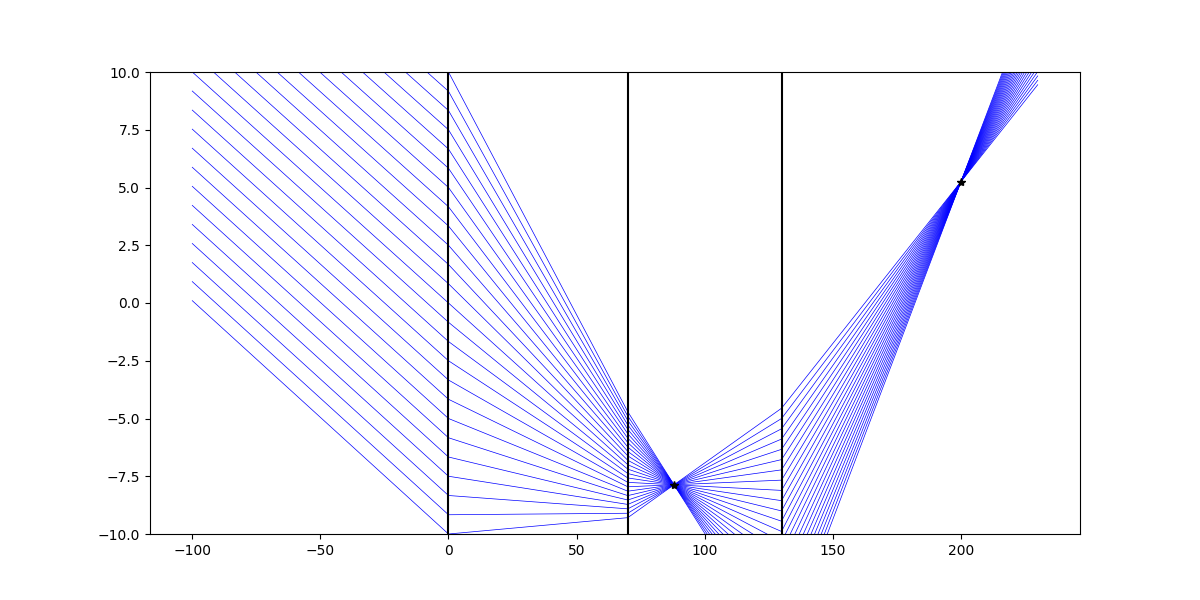

<IPython.core.display.Javascript object>


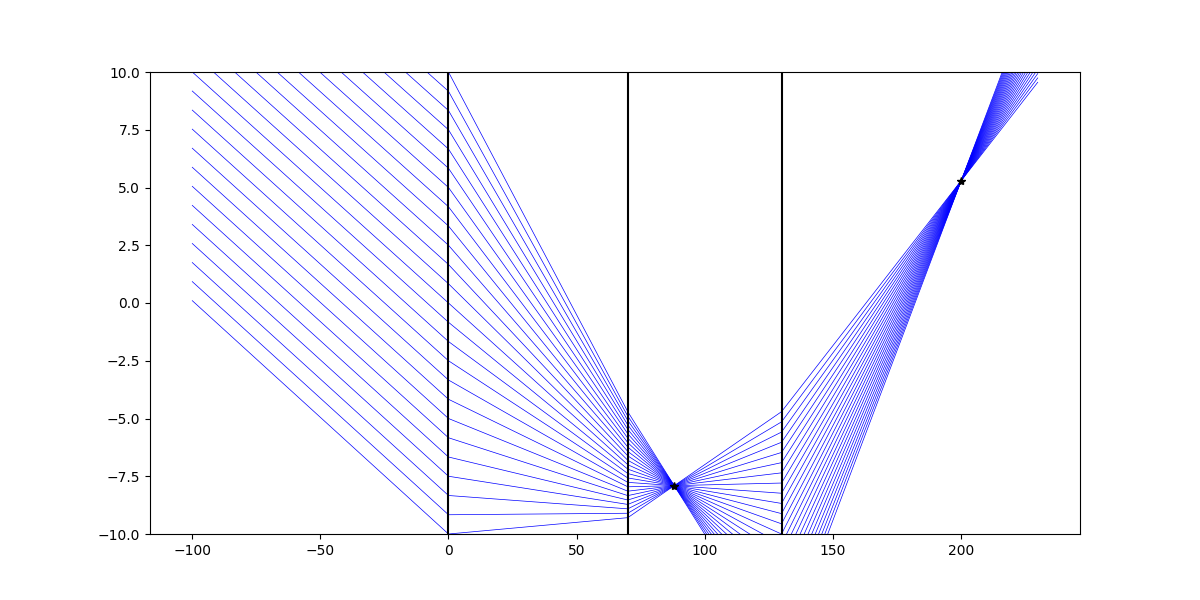

<IPython.core.display.Javascript object>


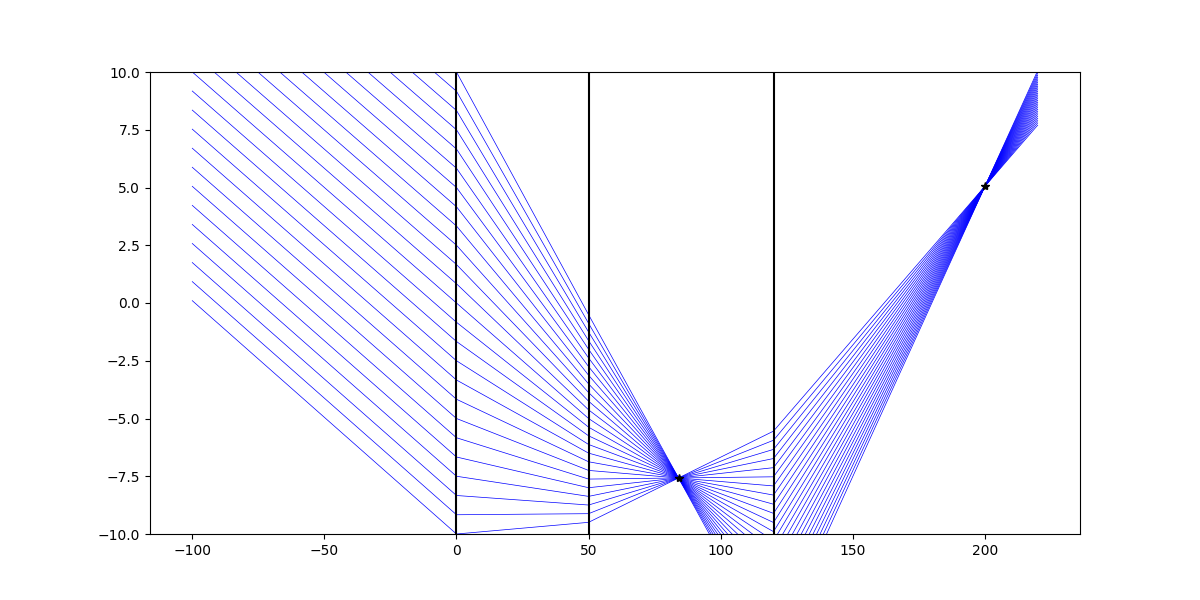

<IPython.core.display.Javascript object>


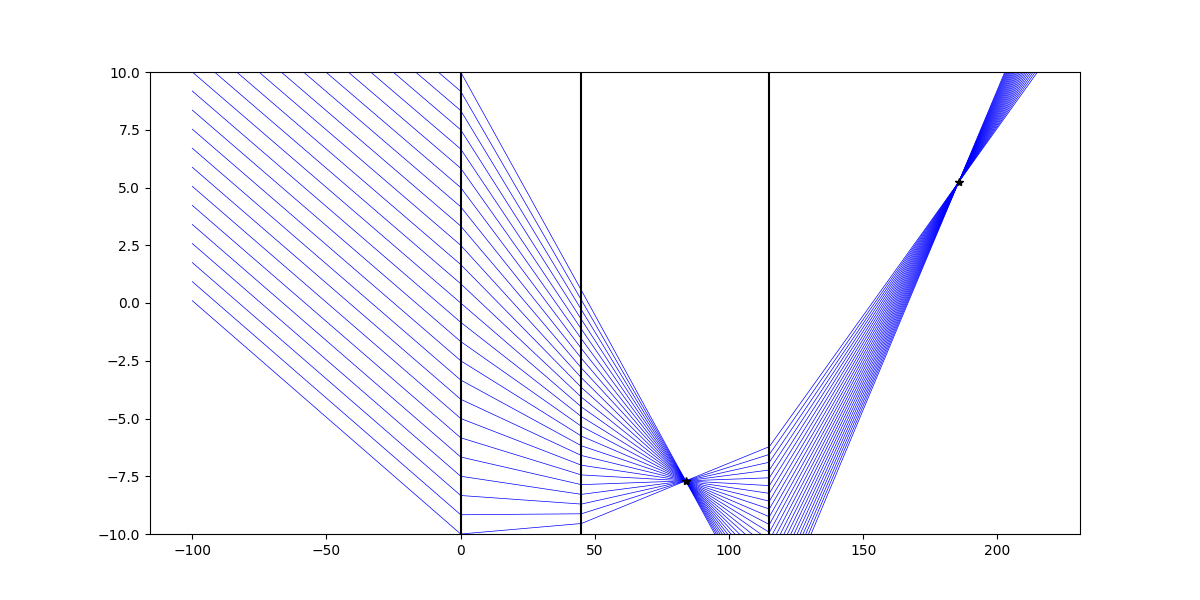

<IPython.core.display.Javascript object>


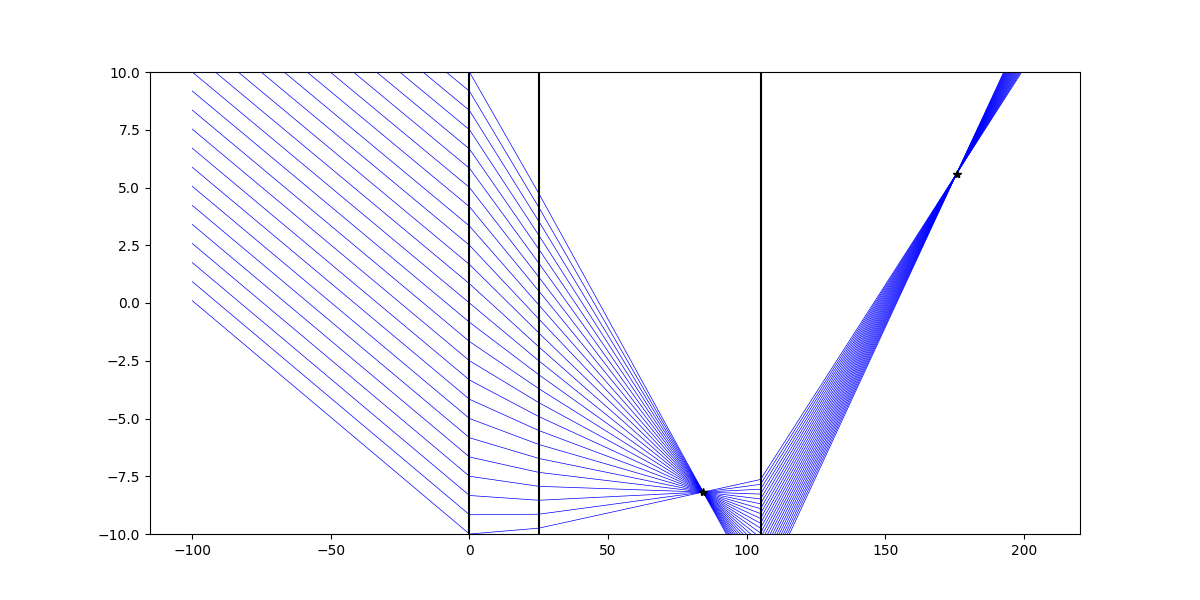

<IPython.core.display.Javascript object>


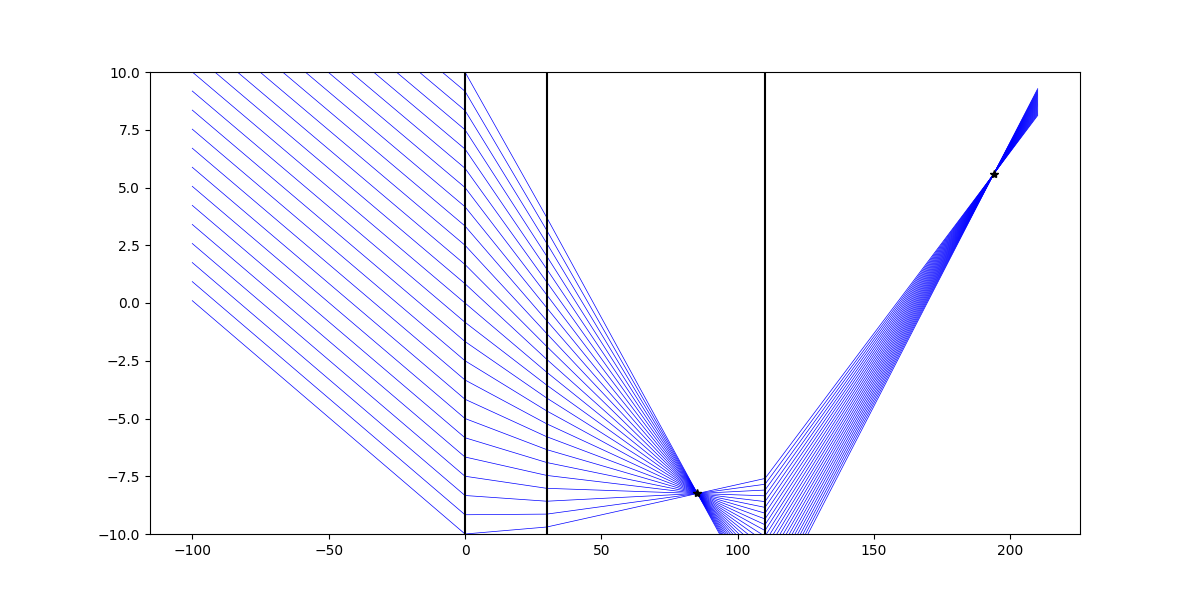

<IPython.core.display.Javascript object>


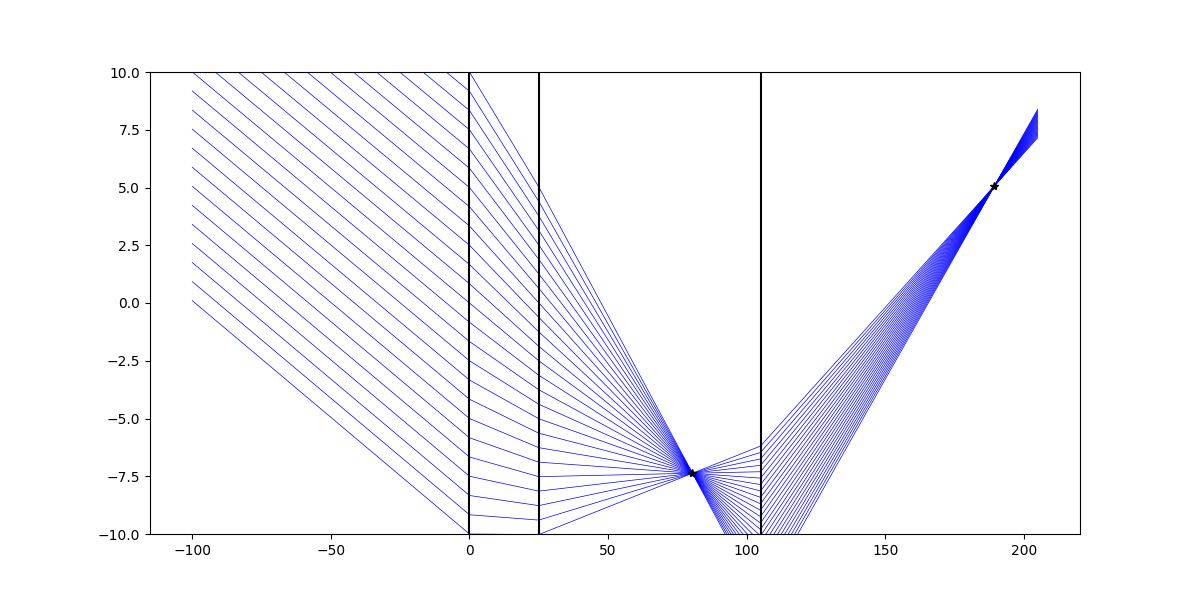

<IPython.core.display.Javascript object>


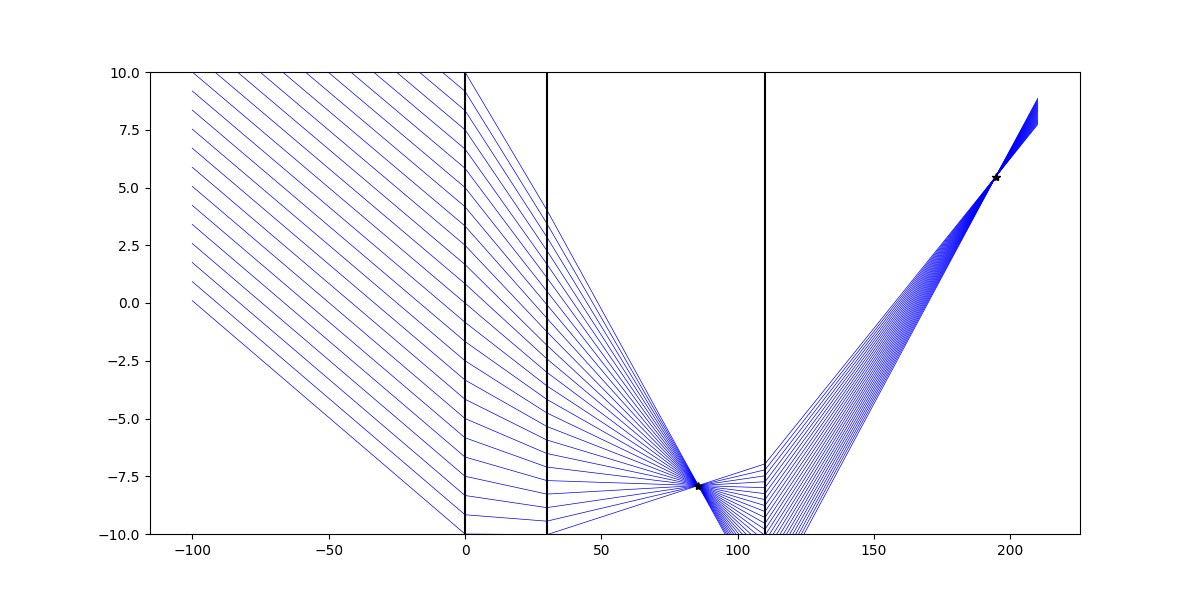

<IPython.core.display.Javascript object>


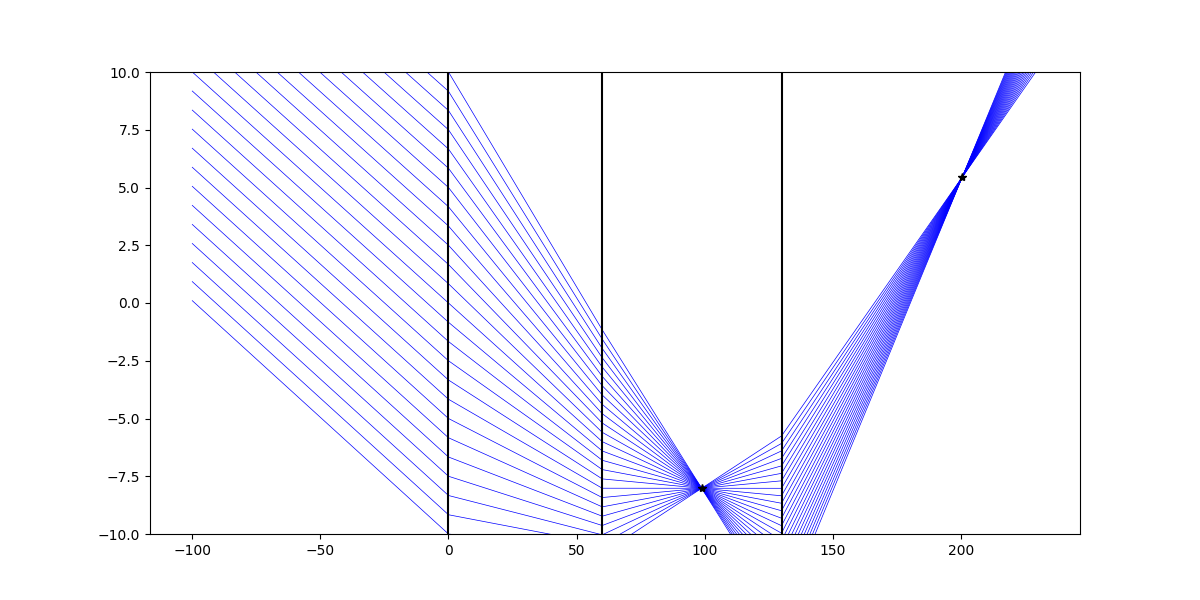

<IPython.core.display.Javascript object>


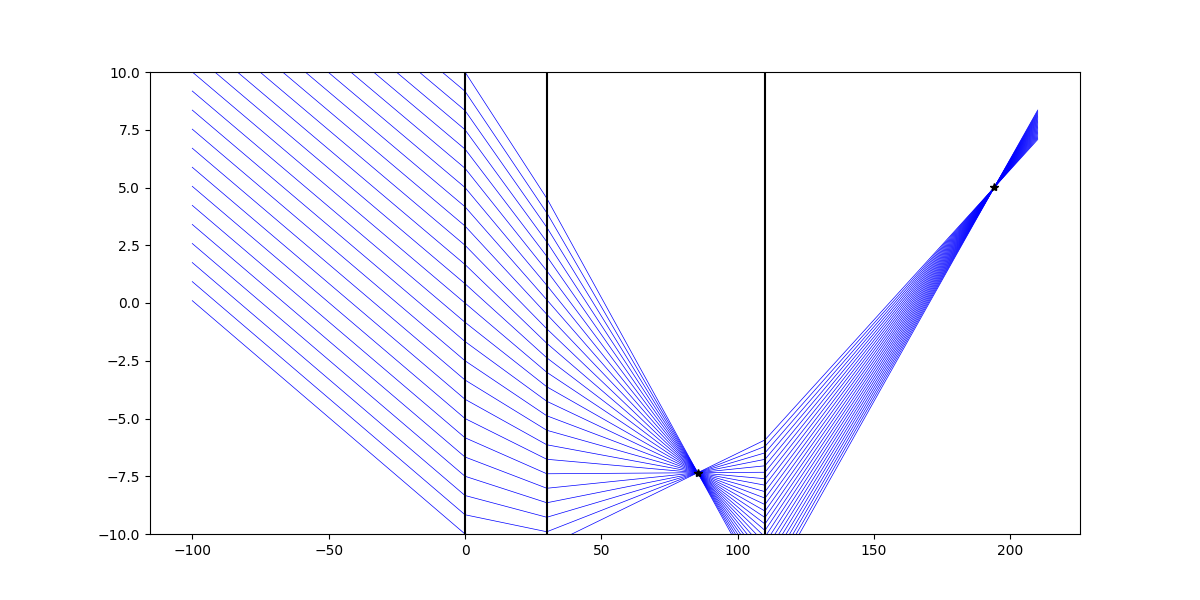

<IPython.core.display.Javascript object>


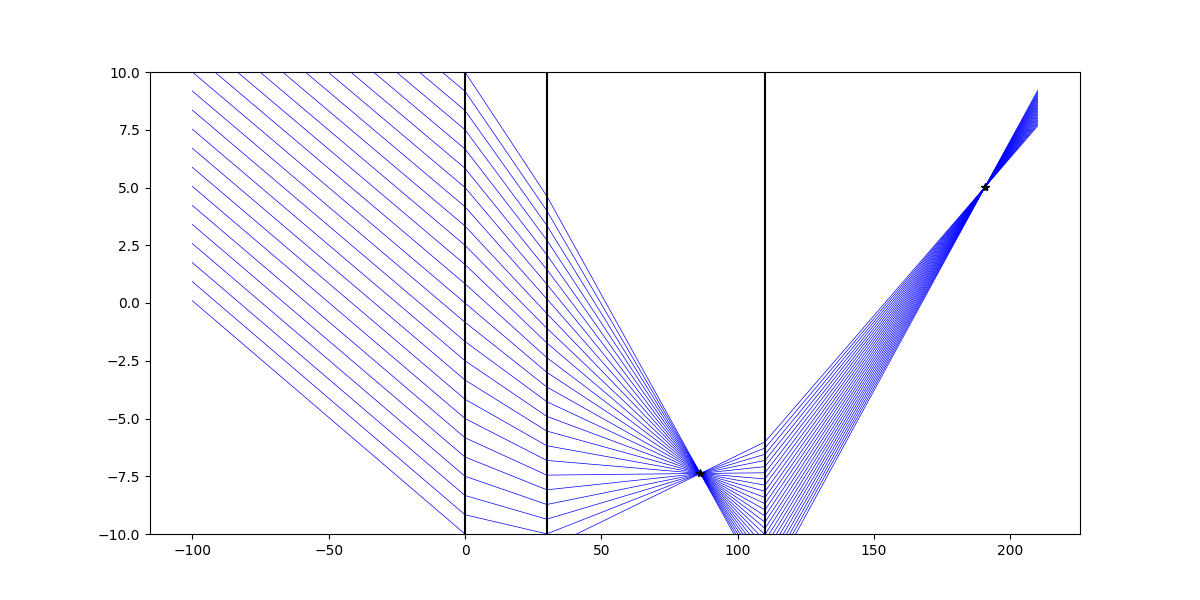

<IPython.core.display.Javascript object>


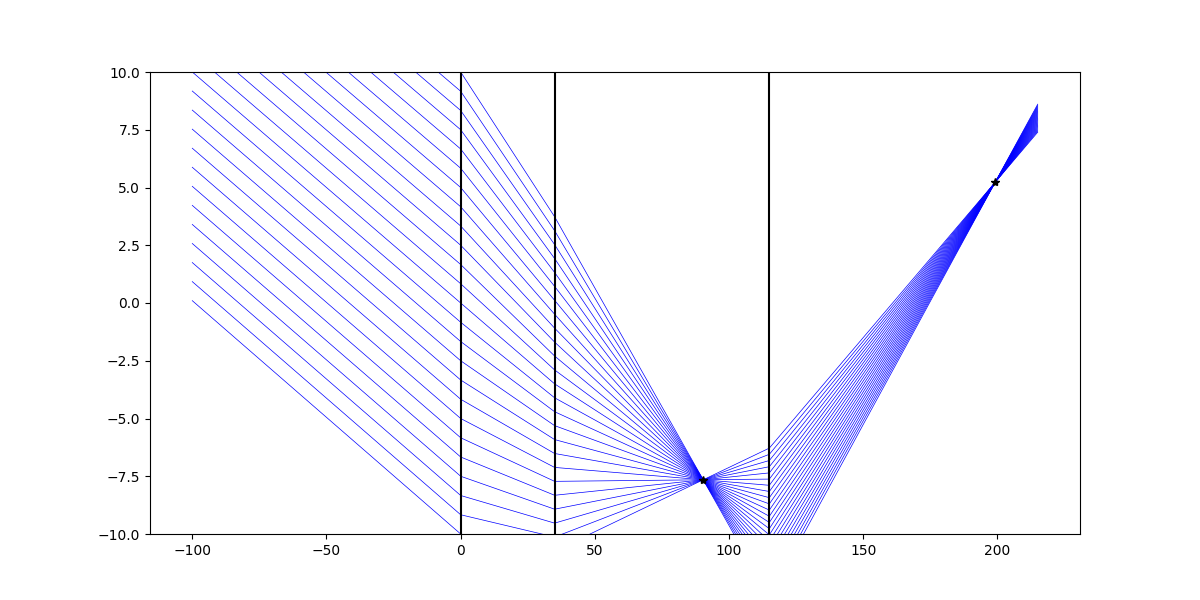

<IPython.core.display.Javascript object>


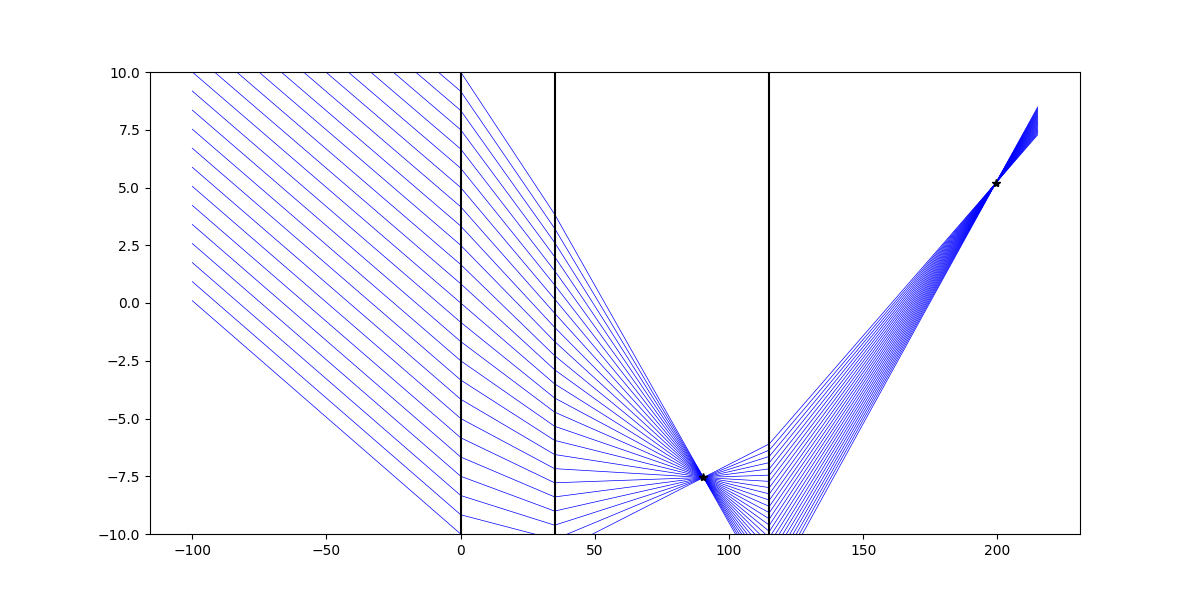

<IPython.core.display.Javascript object>


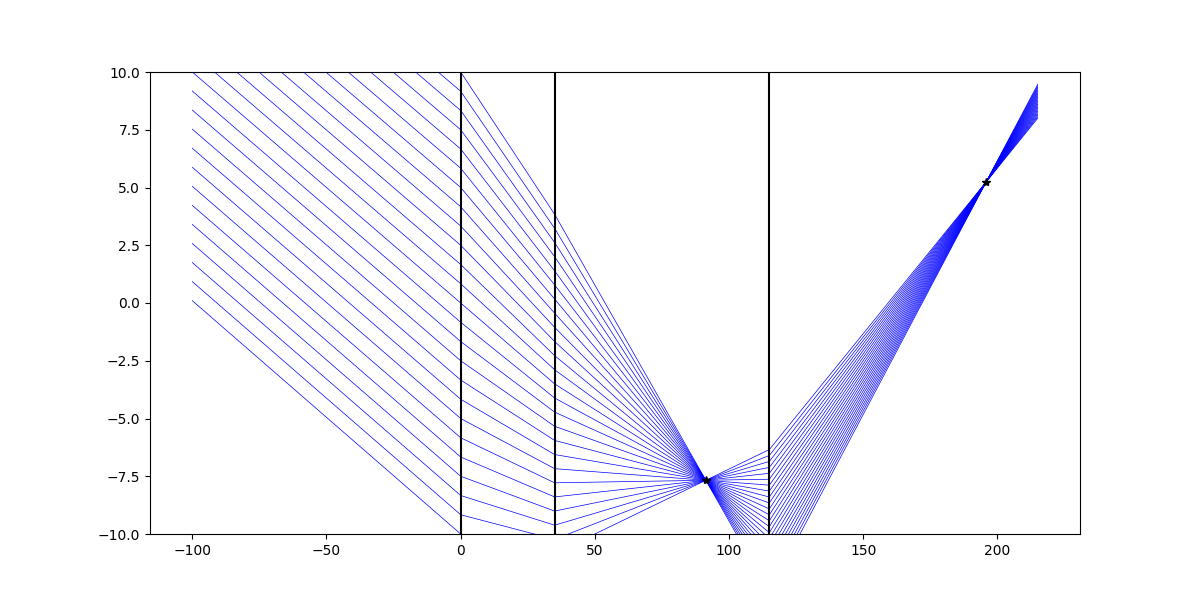

<IPython.core.display.Javascript object>


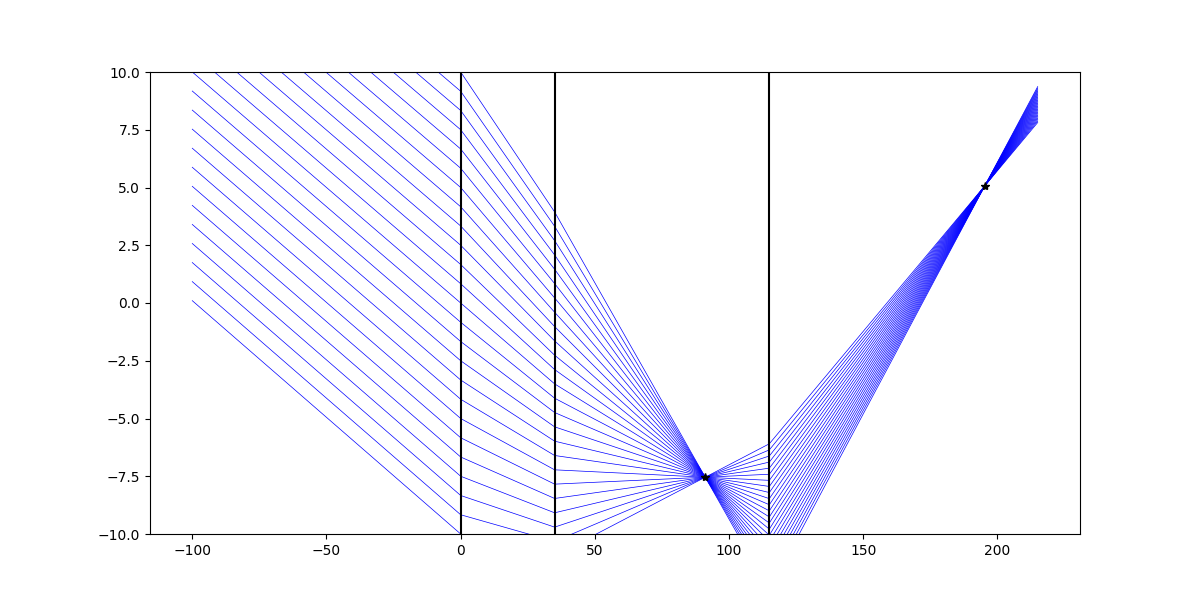

/tmp/ipykernel_283/1695737772.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 6), dpi=80)


<IPython.core.display.Javascript object>


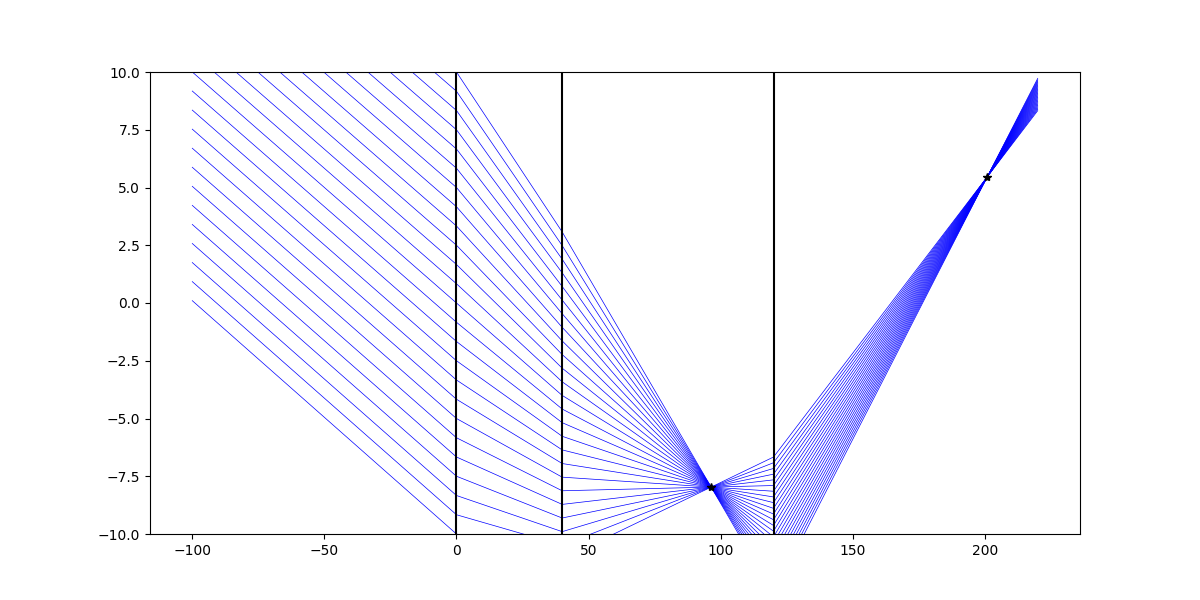

<IPython.core.display.Javascript object>


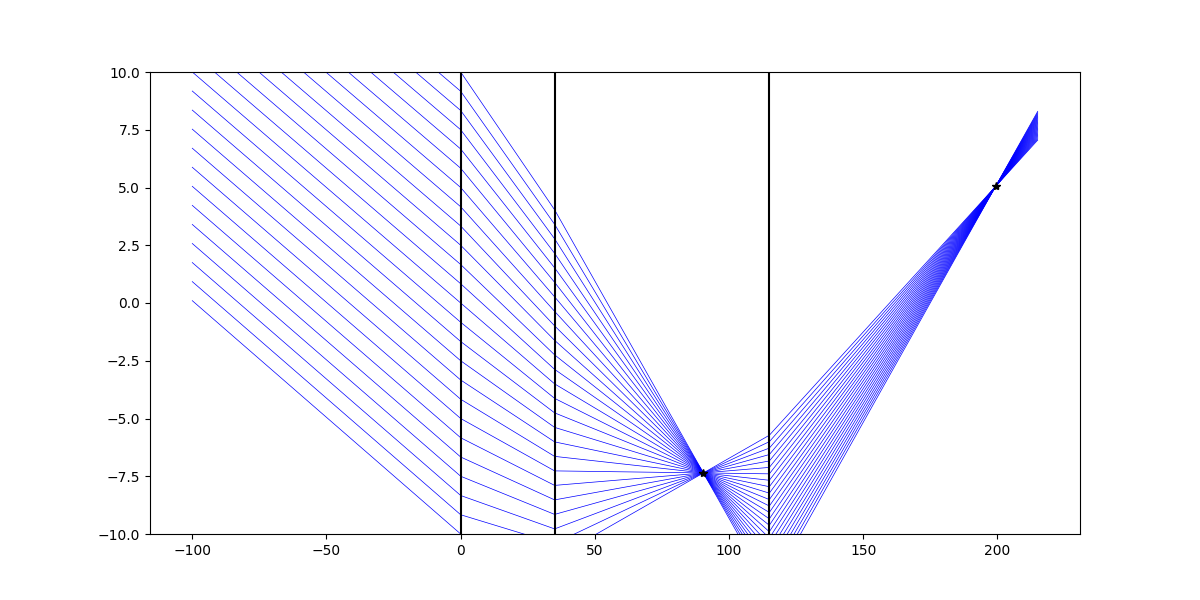

<IPython.core.display.Javascript object>


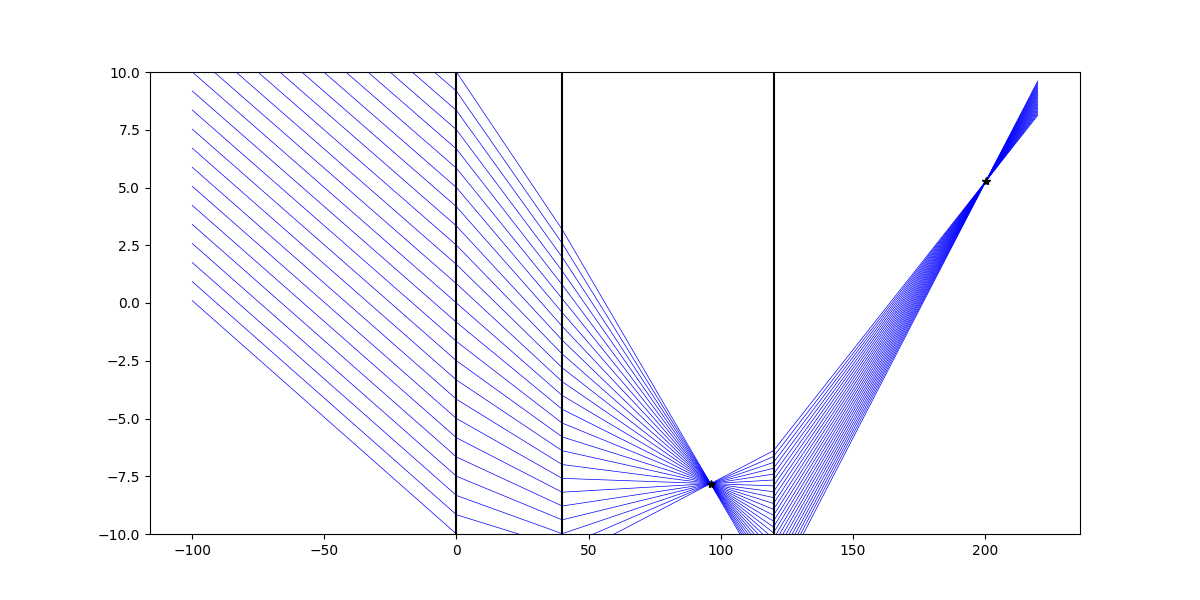

In [23]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
for i in np.arange(0,len(data),1):
    #EXAMPLE:intersection of two rays put through an optical system, as well as graphic output of said rays
    lens1Focal = data[i,4]
    lens2Focal = data[i,5]
    lens3Focal = data[i,6]
    gap1 = data[i,7]
    gap2 = data[i,8]
    lens1 = opticalSystem(lens1Focal, gap1, lens2Focal, gap2, lens3Focal)
    rays = imageRays(9999,1000,10,25)

    x = []
    y = []

    for i in range(0,len(rays[:,0]),1):
        tracedRay = lens1.simRay(rays[i,0],rays[i,1])
        x.append(tracedRay[0])
        y.append(tracedRay[1])

    plt.figure(figsize=(12, 6), dpi=80)
    plt.ylim((-10, 10))
    for i in range(0,len(rays[:,0]),1):
        plt.plot(x[i],y[i],'b',linewidth=0.5)


    plt.axvline(x = 0, color = 'k', label = 'axvline - full height')
    plt.axvline(x = gap1, color = 'k', label = 'axvline - full height')
    plt.axvline(x = gap2+gap1, color = 'k', label = 'axvline - full height')


    images = intersection(x[0],y[0],x[9],y[9])
    plt.plot(images[:,0],images[:,1],'k*')

In [25]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
print(data[:,[4,5,6]])

[[  73. -570.   54.]
 [  90.  120.   42.]
 [  90.  125.   42.]
 [  90.  130.   42.]
 [  90.  135.   42.]
 [  90.  140.   42.]
 [  90.  205.   48.]
 [  90.  255.   42.]
 [  90.  600.   42.]
 [  90.  600.   50.]
 [ 100.  205.   50.]
 [ 100.  255.   50.]
 [ 115.  125.   42.]
 [ 120.  140.   50.]
 [ 125.  135.   48.]
 [ 125.  140.   50.]
 [ 130.  130.   50.]
 [ 130.  135.   48.]
 [ 135.  125.   48.]
 [ 135.  135.   48.]
 [ 140.  115.   50.]
 [ 140.  125.   48.]]
